### 1. Repeat the fake/fair coin example covered in class with a prior probability of form 0.5Beta(20,3) + 0.5Beta(3,20)

Derive the marginal likelhood and create plots similar to the ones in notes/ModelingExamples.ipynb section Fair/Fake coin.

Previously, the following model was proposed for the fake/fair coin example:

\begin{eqnarray}
\pi|m & \sim & \left\{ \begin{array}{cc} \delta(\pi - 0.5) & m = 0\\ \mathcal{B}(\pi; a, b) & m = 1 \end{array} \right.
\end{eqnarray}
For $i = 1\dots N$
\begin{eqnarray}
x^{(i)}| \pi & \sim & \mathcal{BE}(x; \pi)
\end{eqnarray}

Where, $m$ indicates whether the coin is fake or not. When $m=0$, the coin is fair, i.e., $\pi = 0.5$. And when $m=1$, $\pi$ is between $0$ and $1$.

When the coin is fake, we define the following priors distribution for the parameter, $\pi$:

\begin{eqnarray}
\pi|n, m=1 & \sim & \left\{ \begin{array}{cc} \mathcal{B}(\pi; 3, 20) & n = 0\\ \mathcal{B}(\pi; 20, 3) & n = 1 \end{array} \right.
\end{eqnarray}
\begin{eqnarray}
p(n=0) = p(n=1) = 0.5
\end{eqnarray}

The indicator variable, $n$, is essentially a bernouilli distributed random variable with a success probability of $0.5$. I.e.
$$p(n=0) = p(n=1) = 0.5$$

To illustrate, the prior distribution of $\pi$ as defined above corresponds to the following histogram of data simulated in MATLAB:

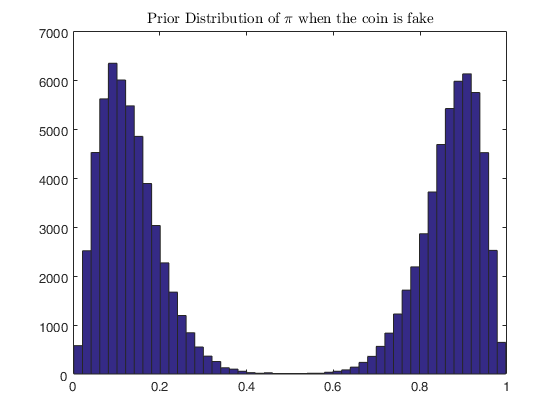

In [19]:
pi_1 = betarnd(20, 3, [1e5 1]);
pi_2 = betarnd(3, 20, [1e5 1]);
op   = binornd(1, 0.5, [1e5, 1]);
u    = pi_1.*op + pi_2.*(1-op);
figure()
hist(u, 50)
title('Prior Distribution of $$\pi$$ when the coin is fake', 'Interpreter', 'Latex')

Since $m$ and $n$ are both defined as discrete variables, we can take the integral wrt. $\pi$ when $n$ is fixed at some value, 0 or 1, and then sum up the probabilities.


1. The coin is not fake; $m=0$
\begin{eqnarray}
p(X|m=0) & = & \int p(X| \pi) \delta(\pi - 0.5) p(n=0) d\pi + \int p(X| \pi) \delta(\pi - 0.5) p(n=1) d\pi\\
& = & \prod_{i=1}^N \left(\frac{1}{2}\right)^{x^{(i)}} \left(\frac{1}{2}\right)^{1-x^{(i)}} = \frac{1}{2^N}
\end{eqnarray}

2. The coin is fake; $m=1$

\begin{eqnarray}
p(X|m=1) & = & \int p(\pi; 3, 20) \prod_{i=1}^{N} p(x^{(i)}| \pi) p(n=0) d\pi  + \int p(\pi; 20, 3) \prod_{i=1}^{N} p(x^{(i)}| \pi) p(n=1) d\pi \\
& = &  \mathcal{B}(\pi; 3, 20)p(n=0) \int \left(\prod_{i=1}^N \left(1-\pi\right)^{1-x^{(i)}} \pi^{x^{(i)}} \right) d\pi + \mathcal{B}(\pi; 20, 3)p(n=1) \int \left(\prod_{i=1}^N \left(1-\pi\right)^{1-x^{(i)}} \pi^{x^{(i)}} \right) d\pi \\
& = & (0.5) \frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \int \left(1-\pi\right)^{c_0+3-1} \pi^{c_1+20-1} d\pi + (0.5)\frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \int \left(1-\pi\right)^{c_0+20-1} \pi^{c_1+3-1} d\pi \\
& = & (0.5)\frac{\Gamma(23)}{\Gamma(20)\Gamma(3)} \Bigg\{ \frac{\Gamma(c_0+20)\Gamma(c_1+3)}{\Gamma(c_0 + c_1 +20 + 3)} + \frac{\Gamma(c_0+3)\Gamma(c_1+20)}{\Gamma(c_0 + c_1 +3+20)} \Bigg\}
\end{eqnarray}

Where, $c_0$ is the total number of heads, and $c_1$ is the total number of tails, thus the total number of times the coin is tossed is: $N = c_0 + c_1$

Using these two equations derived for the conditional distribution of data, we can find the log odds ratio as follows:

$$
L(X) = \log\left( \frac{p(X|m = 0)}{p(X|m = 1)} \right)
$$

In [1]:
c_0 = 6;
c_1 = 1;
N = c_0 + c_1;

fairCoin = (N+1)*log(0.5);
fakeCoin = (0.5*gamma(23)/gamma(20)/gamma(3))*(gamma(c_0+20)*gamma(c_1+3)/gamma(N+23) + gamma(c_0+3)*gamma(c_1+20)/gamma(N+23));
fakeCoin = log(fakeCoin);
logOdds  = fairCoin - fakeCoin
% Log odds ratio when the coin is tossed 7 times and 6 of these were observed as heads.


logOdds =

   -1.8296




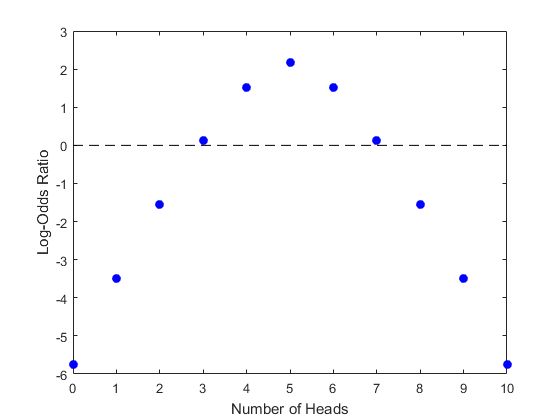

In [2]:
N = 10;

for i = 0:N
    c_0 = i;
    c_1 = N-c_0;
    fairCoin = (N+1)*log(0.5);
    fakeCoin = (0.5*gamma(23)/gamma(20)/gamma(3))*(gamma(c_0+20)*gamma(c_1+3)/gamma(N+23) + gamma(c_0+3)*gamma(c_1+20)/gamma(N+23));
    fakeCoin = log(fakeCoin);
    logOdds(i+1) = fairCoin - fakeCoin;
end

plot(0:10, logOdds, 'ob', 'MarkerFaceColor', 'b')
hold on
plot(xlim, [0 0], '--k')
xlabel('Number of Heads')
ylabel('Log-Odds Ratio')


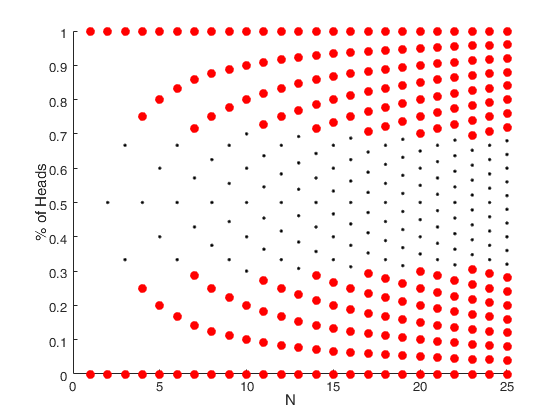

In [14]:
clear logOdds
figure(), hold on;
ylabel('% of Heads')
xlabel('N')
for j = 0:25
    N = j;
    for i = 0:N
        c_0 = i;
        c_1 = N-c_0;
        fairCoin = (N+1)*log(0.5);
        fakeCoin = (0.5*gamma(23)/gamma(20)/gamma(3))*(gamma(c_0+20)*gamma(c_1+3)/gamma(N+23) + gamma(c_0+3)*gamma(c_1+20)/gamma(N+23));
        fakeCoin = log(fakeCoin);
        logOdds(i+1) = fairCoin - fakeCoin;
    end
    p = (0:N)./N;
    ind = find(logOdds<0);
    plot(N*ones(length(p), 1), p, '.k')
    plot(N*ones(length(ind)), p(ind), 'or', 'MarkerFaceColor', 'r')
    clear logOdds
end

### 2. Solve Q74 from the booklet.
We've observed the following dataset:

0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1

Where, $x_t \in \{ 0, 1\}$ and $t = 1, 2, ..., 50$

And we know that the data comes from the following model:

\begin{eqnarray}
\pi_1 \sim \mathcal{B}(1, 1)
\end{eqnarray}
\begin{eqnarray}
\pi_2 \sim \mathcal{B}(1, 1) 
\end{eqnarray}
\begin{eqnarray}
\\
x_t & \sim & \left\{ \begin{array}{cc} \mathcal{BE}(x_t; \pi_1), & t < n \\  \mathcal{BE}(x_t; \pi_2), & t \geq n \end{array} \right.
\end{eqnarray}


Derive, compute and plot the posterior probability of $p(n|x_{1:50})$ given that $n$ is a-priori uniform.

\begin{eqnarray}
n \sim \mathcal{B}(1, 1)
\end{eqnarray}

$$p(n) = \frac{\Gamma(2)}{\Gamma(1)\Gamma(1)} $$

The changepoint, $n$, can be located at 50 different places. For instance, when $n=1$ we have the following model:
<img src="hw4_fig1.png">

Similarly, when $n = 2$ the model is:
<img src="hw4_fig2.png">

And the joint distribution can be factorized as follows:
$$p(n=2, x_{1:50}, \pi_1, \pi_2) = p(\pi_1|n=2) \cdot p(\pi_2|n=2) \cdot p(n=2) \cdot p(x_1|\pi_1) \cdot \prod_{i=2}^{50} p(x_i|\pi_2) $$

We can marginalize over $\pi_1$ and $\pi_2$ by integrating wrt to these two random variables.

\begin{eqnarray}
\begin{gathered}
p(n=2| x_{1:50}) = \int \int p(n=2, x_{1:50}, \pi_1, \pi_2) d\pi_1 d\pi_2
= \int \int p(\pi_1|n=2) \cdot p(\pi_2|n=2) \cdot p(n=2) \cdot p(x_1|\pi_1) \cdot \prod_{i=2}^{50} p(x_i|\pi_2) d\pi_1 d\pi_2 \\
p(n=2| x_{1:50}) = \int \int \frac{1}{50 \cdot \mathcal{B}(1, 1)\mathcal{B}(1, 1)} \left( \pi_{1}^{C_{0,1}} (1-\pi_{1})^{C_{1,1}} \pi_{2}^{C_{0,2}} (1-\pi_{2})^{C_{1,2}} \right) d\pi_1 d\pi_2 
\end{gathered}
\end{eqnarray}

Where, $c_{0,1}$ and $c_{0,2}$ are the total number of heads observed with coin 1 and coin 2; $c_{1,1}$ and $c_{1,2}$ are the total number of tails observed with coin 1 and 2, respectively.

\begin{eqnarray}
\begin{gathered}
p(n=2| x_{1:50}) = \frac{1}{50} \left( \frac {\Gamma(2)}{\Gamma(1) \Gamma(1)} \right)^2 \cdot \left( \frac {\Gamma(1 + C_{0,1}) \Gamma(1 + C_{1,1})}{\Gamma(2 + C_{0,1} + C_{1,1})} \right) \cdot \left( \frac {\Gamma(1 + C_{0,2}) \Gamma(1 + C_{1,2})}{\Gamma(2 + C_{0,2} + C_{1,2})} \right) 
\end{gathered}
\end{eqnarray}

When the same procedure is repeated for the other values of $n$ (i.e. other models available), the following graph is obtained for the conditional distribution:

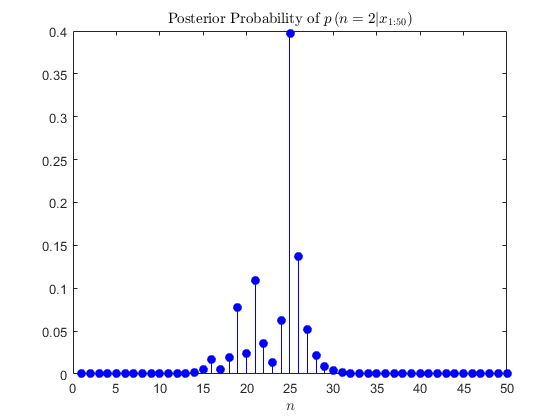

In [5]:
x = [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1];

for n = 1:50
    x1 = x(1:n-1);
    x2 = x(n:end);
    c_11 = 0;
    c_01 = 0;
    c_12 = 0;
    c_02 = 0;
    ppi = 1;
    if isempty(x1) ~= 1
        c_11 = sum(x1);
        c_01 = length(x1) - c_11;
        ppi  = ppi*gamma(2)/gamma(1)/gamma(1);
    end
    if isempty(x2) ~= 1
        c_12 = sum(x2);
        c_02 = length(x2) - c_12;
        ppi  = ppi*gamma(2)/gamma(1)/gamma(1);
    end
    pxi    = gamma(1+c_01)*gamma(1+c_11)/gamma(2+c_01+c_11)*gamma(1+c_02)*gamma(1+c_12)/gamma(2+c_02+c_12);
    p_n(n) = 0.02*ppi*pxi;
end

p_n = p_n./sum(p_n);

stem(1:50, p_n, 'b', 'filled')
title('Posterior Probability of $$p\left( n=2 | x_{1:50} \right)$$', 'Interpreter', 'Latex')
xlabel('$$n$$', 'Interpreter', 'Latex')